In [4]:
# Titanic ML Project
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Data
train = pd.read_csv('C:\\Users\\pchtc\\RandomProjects\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\pchtc\\RandomProjects\\titanic\\test.csv')

# Step 3: Basic Data Exploration
print(train.head())
print(train.info())
print(train.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
# Step 4: Data Cleaning & Feature Engineering
# Fill missing Age values with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing Fare in test set
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = label_enc.fit_transform(train[col])
    test[col] = label_enc.transform(test[col])

# Drop columns that are less predictive
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_ids = test['PassengerId']
test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

C:\Users\pchtc\AppData\Local\Temp\ipykernel_22912\2013837190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\pchtc\AppData\Local\Temp\ipykernel_22912\2013837190.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [12]:
# Step 5: Split Train Data
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Step 8: Predict on Test Set
test_predictions = model.predict(test)

Validation Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:25: SyntaxWarning: invalid escape sequence '\.'
C:\Users\pchtc\AppData\Local\Temp\ipykernel_22912\3946532686.py:25: SyntaxWarning: invalid escape sequence '\.'
  X["Title"] = X["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


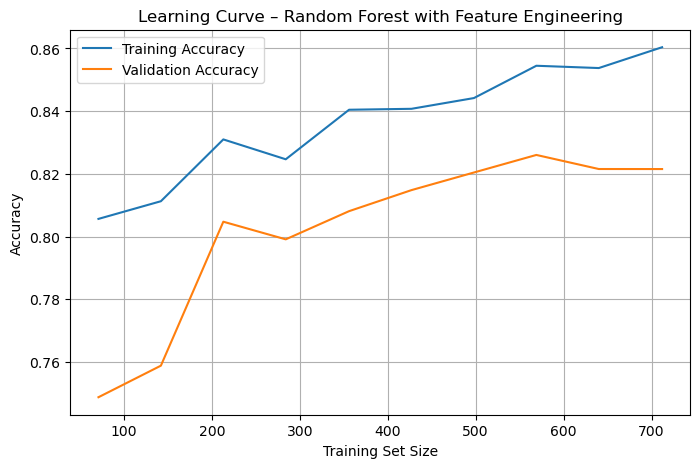

Title_Mr         0.234315
Sex              0.200876
FarePerPerson    0.097276
Fare             0.086066
Pclass           0.075711
Age              0.057966
Title_Miss       0.055724
Title_Mrs        0.052229
PassengerId      0.041925
FamilySize       0.039747
dtype: float64


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# =========================
# Load Data
# =========================
df = pd.read_csv('C:\\Users\\pchtc\\RandomProjects\\titanic\\train.csv')  # Kaggle Titanic training file

y = df["Survived"]
X = df.drop(columns=["Survived"])

# =========================
# Feature Engineering
# =========================

# Family features
X["FamilySize"] = X["SibSp"] + X["Parch"] + 1
X["IsAlone"] = (X["FamilySize"] == 1).astype(int)

# Title extraction
X["Title"] = X["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

rare_titles = [
    "Lady","Countess","Capt","Col","Don","Dr","Major",
    "Rev","Sir","Jonkheer","Dona"
]

X["Title"] = X["Title"].replace(rare_titles, "Rare")
X["Title"] = X["Title"].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"})

# Age imputation by Title + Class
X["Age"] = X.groupby(["Title", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

# Fare features
X["Fare"] = X["Fare"].fillna(X["Fare"].median())
X["FarePerPerson"] = X["Fare"] / X["FamilySize"]

# =========================
# Encoding
# =========================

# Sex encoding
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})

# Embarked encoding
X["Embarked"] = X["Embarked"].fillna("S")
X = pd.get_dummies(X, columns=["Embarked"], drop_first=True)

# Title encoding
X = pd.get_dummies(X, columns=["Title"], drop_first=True)

# Drop ID-like columns
X = X.drop(columns=["Name", "Ticket", "Cabin"])

# =========================
# Model
# =========================
model = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# =========================
# Learning Curve
# =========================
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X,
    y,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# =========================
# Plot
# =========================
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, val_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Random Forest with Feature Engineering")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Feature Importance
# =========================
model.fit(X, y)

importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importances.head(10))


After feature engineering, the learning curve showed strong early gains but a growing train–validation gap. That told me the model was mildly overfitting.


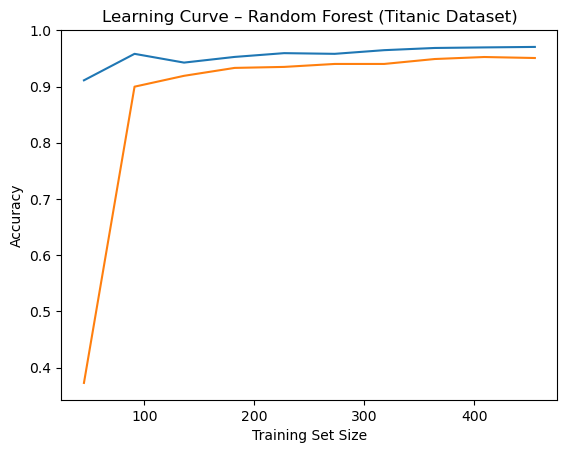

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean)
plt.plot(train_sizes, val_mean)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Random Forest (Titanic Dataset)")
plt.show()